In [20]:
import numpy as np

import matplotlib.pyplot as plt

In [108]:


class FlowGrid:
    def __init__(self, xmin, xmax, ymin, ymax, step, resolution_curve = 0.01):
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.step = step
        self.x = np.arange(xmin, xmax+step, step)
        self.y = np.arange(ymin, ymax+step, step)
        self.grids = np.meshgrid(self.x, self.y)

        
        self.flow = np.zeros((len(self.y), len(self.x), 2))
        self.flow[:, :, 0] = - self.grids[1] #(-y)
        self.flow[:, :, 1] = self.grids[0] #x


        self.interp = np.zeros((len(self.y)-1, len(self.x)-1, 2))
        for i in range(len(self.y)-1):
            for j in range(len(self.x)-1):
                up = (self.flow[i+1, j, :] + self.flow[i, j, :])/2
                down = (self.flow[i+1, j+1, :] + self.flow[i, j+1, :])/2
                self.interp[i, j, :] = (up + down) / 2
    


    def getFirstPoint(self):
        np.random.seed(0)
        x = np.random.uniform(self.xmin, self.xmax)
        y = np.random.uniform(self.ymin, self.ymax)

        # start at (1,0)
        x = 5
        y = 0

        i_index = int((y - self.ymin) / self.step)
        j_index = int((x - self.xmin) / self.step) # for the following step

        self.curvePoint = [np.array([y, x, i_index, j_index])]
    

    
    def getNextPoint(self):
        y = self.curvePoint[-1][0]
        x = self.curvePoint[-1][1]

        i_index = int(self.curvePoint[-1][2]) # lines (y)
        j_index = int(self.curvePoint[-1][3]) # columns (x)

        x_min = self.grids[0][0, j_index]
        y_min = self.grids[1][i_index, 0 ]

        x_max = x_min + step
        y_max = y_min + step



        dx = self.interp[i_index, j_index, 0]
        dy = self.interp[i_index, j_index, 1]


        if dx >= 0:
            tx = (x_max - x) / dx
        else:
            tx = (x_min - x) / dx
        if dy >= 0:
            ty = (y_max - y) / dy
        else:
            ty = (y_min - y) / dy
        
        t_values = [tx, ty]
        t_min = min(t_values, default=None)
        intersection = None
        if t_min is not None:
            x = x + t_min * dx
            y = y + t_min * dy
            intersection = (x, y)
        if intersection[0] == x_min:
            j_index = j_index - 1
        elif intersection[1] == y_min:
            i_index = i_index - 1
        elif intersection[0] == x_max:
            j_index = j_index + 1
        elif intersection[1] == y_max:
            i_index = i_index + 1
        next_point = [intersection[1], intersection[0], i_index, j_index]
        if i_index < 0 or j_index < 0 or i_index >= len(self.y) or j_index >= len(self.x):
            return None
        self.curvePoint.append(next_point)



xmin = -10.5
xmax = 10.5
ymin = -10.5
ymax = 10.5
step = 1
flowGrid = FlowGrid(xmin, xmax, ymin, ymax, step)
print(flowGrid.grids[0])
print(flowGrid.grids[1])
flowGrid.getFirstPoint()
for i in range(100):
    flowGrid.getNextPoint()
print(flowGrid.curvePoint)


[[-10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5
    1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5]
 [-10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5
    1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5]
 [-10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5
    1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5]
 [-10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5
    1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5]
 [-10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5
    1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5]
 [-10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5
    1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5]
 [-10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5
    1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5]
 [-10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4

C:\Users\jean-\AppData\Local\Temp\ipykernel_11368\4126285787.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  tx = (x_max - x) / dx
C:\Users\jean-\AppData\Local\Temp\ipykernel_11368\4126285787.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  ty = (y_max - y) / dy


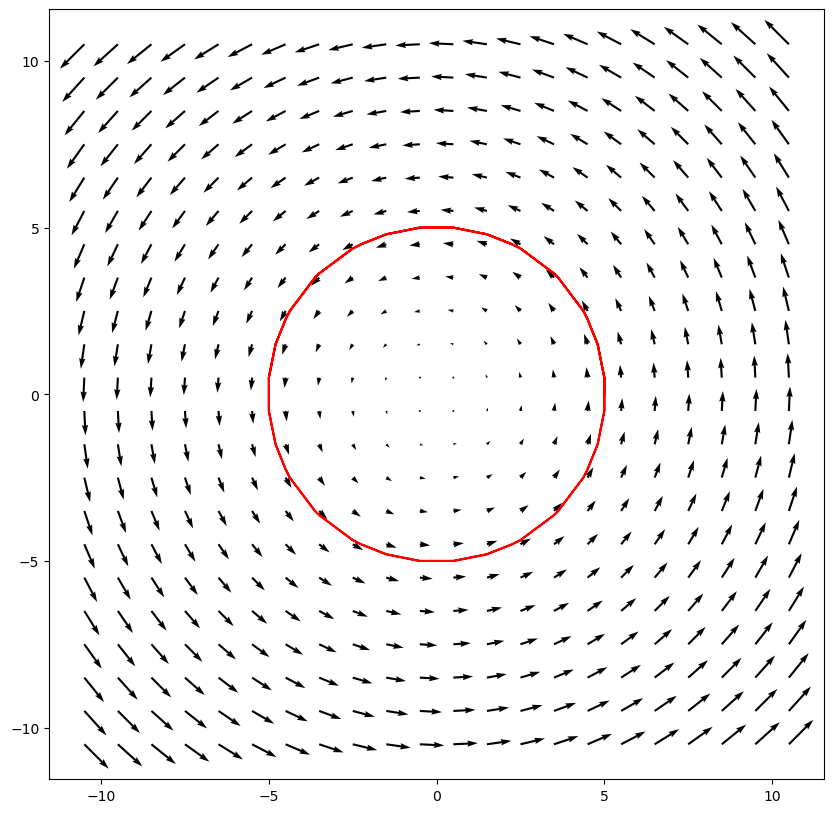

In [109]:
plt.figure(figsize=(10, 10))
plt.quiver(flowGrid.grids[0], flowGrid.grids[1], flowGrid.flow[:, :, 0], flowGrid.flow[:, :, 1])
plt.plot([p[1] for p in flowGrid.curvePoint], [p[0] for p in flowGrid.curvePoint], 'r-')